# HiMCM Session 6
# Linear Regression Model


A **linear relationship** between two variables is one in which the scatterplot of them looks roughly like a line.  **Linear regression** is a method for modelling how a **dependent variable** linearly depends on one or more **independent variables**.  The dependent variable (also called a **response variable** and many other things) is what we are trying to model or predict, and is usually denoted $Y$.  The independent variables (also called **explanatory** or **input variables**) are the information we are using to make the predictiong, and are usually denoted $X_1, X_2, ...$.

The linear relationship is: $$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n + \epsilon$$
where $\epsilon$ (epsilon) represents the error.

Here, $Y, X_1, X_2, ..., X_n$ are *random variables* that can take different values with different probabilities.

Linear regression finds the coefficients $\beta_0, \beta_1, ..., \beta_n$ so that the sum of the squares of the error term for each data observation is minimized.


As an example, we will look at a dataset about Boston housing prices in the 1970s.

In [1]:
# Load the dataset from the sci-kit learn package.
from sklearn.datasets import load_boston
boston_dict = load_boston()

In [2]:
# Display the variable boston_dict:
boston_dict

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
# Display the list of keys
boston_dict.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# Display the value linked to "feature_names"
boston_dict["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# This dictionary contains description of the data set
print(boston_dict["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

To better analyze the data, let's convert it into a **Pandas data frame**.

In [6]:
import pandas as pd

boston = pd.DataFrame(data=boston_dict.data)

In [7]:
# Display the data frame
boston

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
# There are no column names, so let's repeat that command, but telling Pandas 
# that the column names are in feature_names
boston = pd.DataFrame(data=boston_dict.data,
                      columns=boston_dict.feature_names)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
# So far we have created a data frame with all independent variables.
# Let's also add the price data to the data frame.
boston["price"] = boston_dict.target 

# Display the first several rows to verify that the new column was added correctly.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='RM', ylabel='price'>

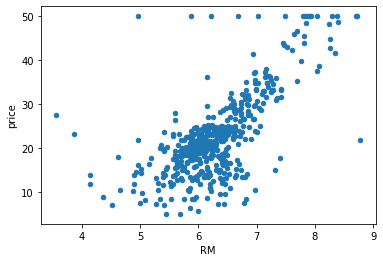

In [10]:
# Let look at the relationship between the price and the average number of rooms (RM)
boston.plot.scatter(x="RM", y="price")

There seems to be a linear relationship between RM and price. How can we find a line that best describes this relation?
- What is the mathematcial expression of a straight line?
- Given two different lines, how do we tell which one fits the data better?
- How to find the line that best fits the data?

Let's perform linear regression using the `statsmodel` library.

In [ ]:
import statsmodels.formula.api as smf

lm = smf.ols('price ~ RM',boston).fit()
lm.summary()

## Interpreting the Linear Regression Summary
- Dep. Variable
- Method
- Date and Time
- No. Observations
- Df Residuals: The degree of freedom
- Df Model: The number of dependent variables
- **R-squared**: How much of the changes dependent variables is explained by the changes in independent variables
- **Adjusted R-squared**: A better performance measure for multiple dependent variables
- **Prob(F statistic)**: How likely did this trend occur by pure luck?
- **coef**: Estimates of model coefficients
- **P > |t|**: How likely the true value of this coefficient is actually zero? This value is call the **p-value**.
- [0.025, 0.975]: The confidence interval of the coefficient


In [ ]:
# Build a linear model on price and crime rate (CRIM)
# Is this a stronger relationship?


In [ ]:
# Visualize the regression line with data
import seaborn as sns

sns.regplot(y="price", x="RM", data=boston, fit_reg = True)

## Is Linear Regression a Good Choice?

The **residuals** are the difference between the actual value of price and the value predicted by the regression line, for each row of the data. If the linear model is a good fit, the histogram should look like a **normal distribution**.


In [ ]:
# Display the residuals
lm.resid

In [ ]:
lm.resid.hist(bins = 20)

In [ ]:
lm

Another good way to check the model performance is to visualize the predicted prices with the true prices.

In [ ]:
# Extract model predictions on the data
lm.fittedvalues

In [ ]:
# Draw a scatter plot with the true price as the x coordinate and the 
# predicted price as the y coordinate.


**Discussion**
- If all the prices were predicted correctly, what would this plot have looked like?
- Where does the linear model fail badly?

# Homework \#3

1. **(Skip this one)** Use a linear model to describe how pupil-teacher ration (PTRATIO) affects the housing prices.

    - Perform linear regression and find the expression of the regression line.
    - Plot the line together with the data
    - Access whether the linear model properly describes the relationship:
        - Is the R-squared value close to 1?
        - Are the p-values of coefficients close to zero?
        - Is the histogram of the residuals close to a normal distribution?
        - Is the true vs. prediction plot close to a diagonal line?
    
2. **Smart Air-Conditioning by Programmable thermostats**

No one wants to spend more money than necessary on heating and air conditioning. But, everyone wants to be comfortable and cozy while at home. The development of programmable thermostats was an initial effort to assist in reducing energy costs. With a programmable thermostat, you can manually preset a schedule of temperature increases and decreases for weekdays and weekends, and day and night periods, to keep your home cool or warm when needed, but save energy when not needed. 

Suppose that you are designing a next-generation smart air-conditioning system for your house. Describe how this system can manage the home temperature automatically so that you and your family can live comfortably while the energy cost get reduced.

- Search for information on how existing smart air-conditioning system can achieve.
- Describe what information your systems needs know.
- Describe how your system determines the home temperature given the information it collects.
- Spend **no more than 2 hours** on this assignment.
- Write an essay to report your design. Submit to Liang.Zhao1@lehman.cuny.edu before **Thursday, June 24th at 11:59PM**

    